In [1]:
import os 

In [3]:
import pandas as pd 

In [5]:
df = pd.read_csv("demo_client.csv")
df.head(8)

,Summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,OrgId,ParticipantId,DeviceId,InstalledDate,AcceptanceDate,Extension,BrowsingCount,BookmarkCount,CookieCount,NaN
1,py_demo_client,demoUser@py-insights.com,2nwjevbvxzm7ehb254,2025-02-20T23:58:02-08:00,2025-02-20T23:58:20-08:00,Chrome,5104,0,0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Browsing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
5,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
6,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
7,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Summary     5108 non-null   object
 1   Unnamed: 1  5107 non-null   object
 2   Unnamed: 2  5107 non-null   object
 3   Unnamed: 3  5107 non-null   object
 4   Unnamed: 4  5107 non-null   object
 5   Unnamed: 5  5107 non-null   object
 6   Unnamed: 6  5054 non-null   object
 7   Unnamed: 7  5107 non-null   object
 8   Unnamed: 8  5107 non-null   object
 9   Unnamed: 9  5105 non-null   object
dtypes: object(10)
memory usage: 399.3+ KB


In [ ]:
"""
Clean & Reshape the Data (Extract true header)
We identified the row that contains the true header (where the last column is eventtime)
extracted it as column names, and created a clean dataframe from the rows below. Why we did it Real-world CSVs are often messy They may contain metadata, 
summaries, and multiple header rows.If we don’t fix the header, all later analysis (groupby, filtering) becomes hard or wrong. So this step Removes non-data rows (summary/empty rows). 
Gives us correct column names Leaves us with only actual browsing events.

"""
header_index = df[df["Unnamed: 9"] == "eventtime"].index[0]

In [8]:
true_header = df.iloc[header_index].values

In [9]:
df_clean = df.iloc[header_index + 1:].copy()
df_clean.columns = true_header

In [10]:
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean.head()

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21T07:57:38.017Z,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00


In [ ]:
"""
To analyze behavior over time, we need time columns in proper datetime format, not just strings.
We created:
date for daily activity trends (number of visits per day)
hour for time-of-day patterns (which hours are most active)
dayofweek for weekday patterns (which days are busiest)

"""

df_clean['eventtime'] = pd.to_datetime(df_clean['eventtime'], errors='coerce')
df_clean['eventtimeutc'] = pd.to_datetime(df_clean['eventtimeutc'], errors='coerce')

In [13]:
df_clean['date'] = df_clean['eventtime'].dt.date
df_clean['hour'] = df_clean['eventtime'].dt.hour
df_clean['dayofweek'] = df_clean['eventtime'].dt.day_name()

In [14]:
df_clean.head()

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime,date,hour,dayofweek
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21 07:58:02.688000+00:00,link,NaN,166328,0,2025-02-20 23:58:02-08:00,2025-02-20,23,Thursday
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21 07:57:51.308000+00:00,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20 23:57:51-08:00,2025-02-20,23,Thursday
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.972000+00:00,link,PY Insights | Product,166319,0,2025-02-20 23:57:40-08:00,2025-02-20,23,Thursday
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.988000+00:00,link,PY Insights | Product,166321,0,2025-02-20 23:57:40-08:00,2025-02-20,23,Thursday
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21 07:57:38.017000+00:00,link,PY Insights | Product,166318,0,2025-02-20 23:57:38-08:00,2025-02-20,23,Thursday


In [ ]:
from urllib.parse import urlparse

def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        domain = domain.replace("www.", "")
        return domain
    except:
        return None

df_clean['domain'] = df_clean['url'].apply(extract_domain)

df_clean[['url', 'domain']].head()


,url,domain
0,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,hkmmnfimlpcphpgnmgdecpdpaefjnlga
1,https://chromewebstore.google.com/detail/snaps...,chromewebstore.google.com
2,https://py-insights.com/account/demo/product?s...,py-insights.com
3,https://py-insights.com/account/demo/product?s...,py-insights.com
4,https://py-insights.com/account/demo/product,py-insights.com


In [16]:
df_clean[['url','domain']].head(10)
df_clean['domain'].value_counts().head(15)

domain
google.com                          1328
upwork.com                           473
mail.google.com                      149
pyinsightscom.sharepoint.com         140
loopnet.com                          133
eu-west-1.console.aws.amazon.com     128
amazon.in                            123
wellfound.com                        107
zipair.net                           106
facebook.com                         104
gitlab.com                            71
accounts.google.com                   61
go.xero.com                           60
taskrabbit.com                        59
pyinsightscom-my.sharepoint.com       52
Name: count, dtype: int64

In [ ]:
def categorize_domain(domain):
    if domain is None:
        return "Other"
    
    d = domain.lower()

    if "upwork" in d or "wellfound" in d or "taskrabbit" in d or "linkedin" in d:
        return "Jobs & Freelancing"
    
    if "amazon." in d or "flipkart" in d or "instacart" in d:
        return "E-commerce"
    
    if "zipair" in d or "airasia" in d or "britishairways" in d:
        return "Travel"
    
    if ("sharepoint" in d or "gitlab" in d or "xero" in d 
        or "aws.amazon" in d or "console.aws.amazon" in d
        or "py-insights.com" in d or "pyinsights" in d
        or "teams.microsoft" in d or "onedrive.live.com" in d
        or "login.microsoftonline" in d or "app.pinecone.io" in d):
        return "Work & Tools"
    
    if ("google.com" in d or "chromewebstore.google.com" in d 
        or "accounts.google.com" in d or "mail.google.com" in d):
        return "Search & Research"
    
    if "facebook.com" in d or "instagram.com" in d or "x.com" in d or "twitter.com" in d:
        return "Social"
    
    return "Other"

df_clean["category"] = df_clean["domain"].apply(categorize_domain)

df_clean[["domain", "category"]].head(10), df_clean["category"].value_counts()


(                             domain           category
 0  hkmmnfimlpcphpgnmgdecpdpaefjnlga              Other
 1         chromewebstore.google.com  Search & Research
 2                   py-insights.com       Work & Tools
 3                   py-insights.com       Work & Tools
 4                   py-insights.com       Work & Tools
 5                   py-insights.com       Work & Tools
 6    cs-rtl.my.salesforce-sites.com              Other
 7                   py-insights.com       Work & Tools
 8    cs-rtl.my.salesforce-sites.com              Other
 9    cs-rtl.my.salesforce-sites.com              Other,
 category
 Search & Research     1704
 Other                 1566
 Jobs & Freelancing     667
 Work & Tools           492
 E-commerce             365
 Social                 163
 Travel                 147
 Name: count, dtype: int64)

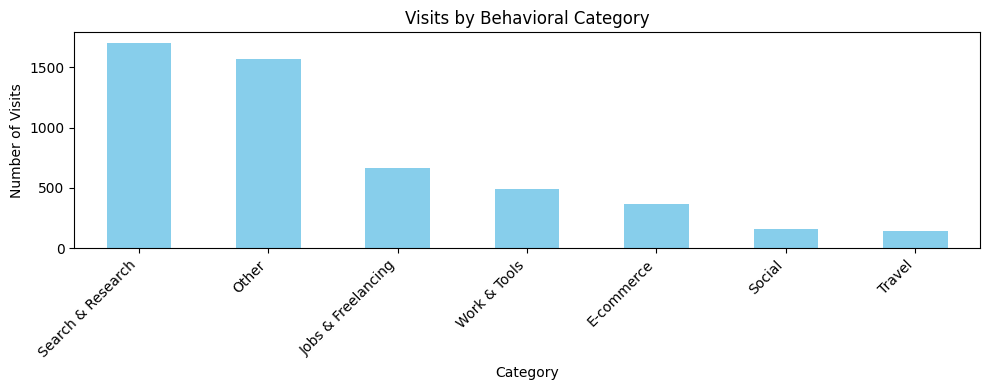

category
Search & Research     1704
Other                 1566
Jobs & Freelancing     667
Work & Tools           492
E-commerce             365
Social                 163
Travel                 147
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

category_counts = df_clean["category"].value_counts()

plt.figure(figsize=(10,4))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Visits by Behavioral Category")
plt.xlabel("Category")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

category_counts

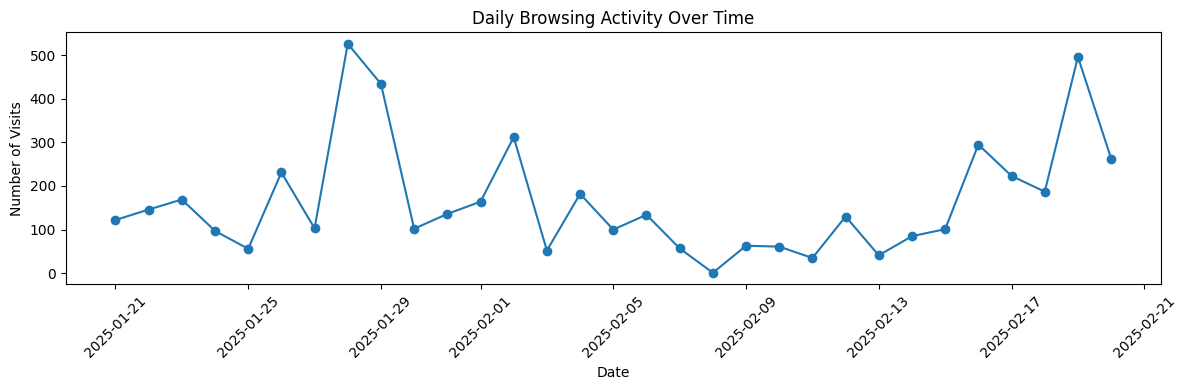

date
2025-01-21    122
2025-01-22    146
2025-01-23    169
2025-01-24     97
2025-01-25     56
dtype: int64

In [ ]:
daily_counts = df_clean.groupby("date").size()

plt.figure(figsize=(12,4))
daily_counts.plot(kind="line", marker="o")
plt.title("Daily Browsing Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

daily_counts.head()

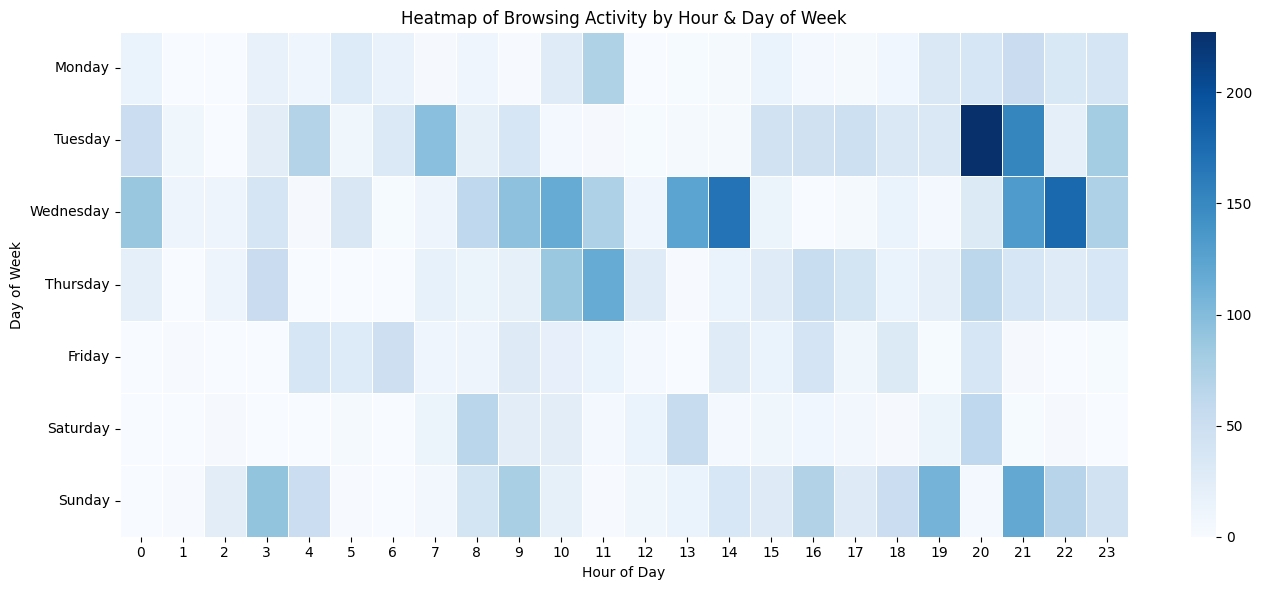

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_clean.pivot_table(
    index="dayofweek",
    columns="hour",
    values="url",
    aggfunc="count"
).fillna(0)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(day_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Blues", linewidths=0.5)
plt.title("Heatmap of Browsing Activity by Hour & Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


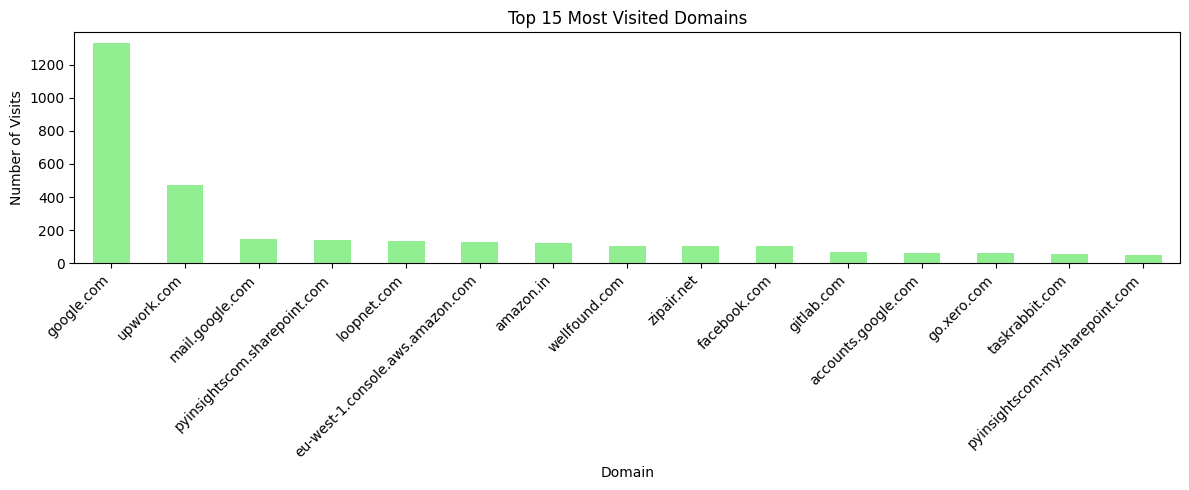

domain
google.com                          1328
upwork.com                           473
mail.google.com                      149
pyinsightscom.sharepoint.com         140
loopnet.com                          133
eu-west-1.console.aws.amazon.com     128
amazon.in                            123
wellfound.com                        107
zipair.net                           106
facebook.com                         104
gitlab.com                            71
accounts.google.com                   61
go.xero.com                           60
taskrabbit.com                        59
pyinsightscom-my.sharepoint.com       52
Name: count, dtype: int64

In [ ]:
top_domains = df_clean['domain'].value_counts().head(15)

plt.figure(figsize=(12,5))
top_domains.plot(kind='bar', color="lightgreen")
plt.title("Top 15 Most Visited Domains")
plt.xlabel("Domain")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_domains


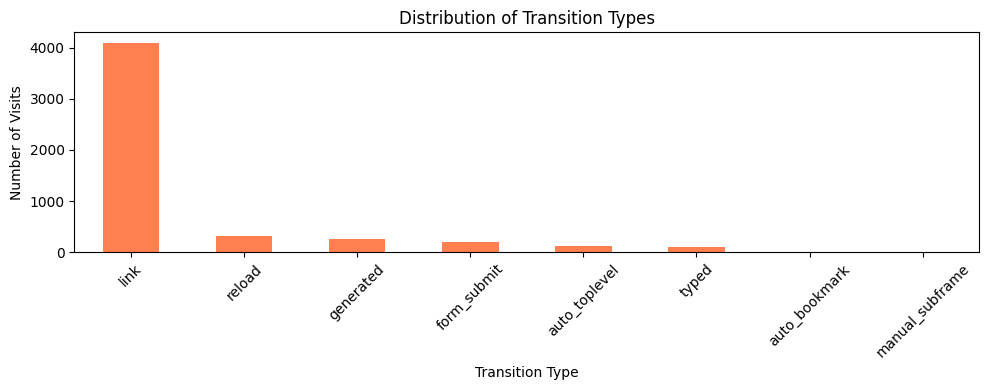

transition
link               4098
reload              321
generated           259
form_submit         204
auto_toplevel       113
typed               105
auto_bookmark         3
manual_subframe       1
Name: count, dtype: int64

In [ ]:
transition_counts = df_clean['transition'].value_counts()

plt.figure(figsize=(10,4))
transition_counts.plot(kind='bar', color="coral")
plt.title("Distribution of Transition Types")
plt.xlabel("Transition Type")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

transition_counts
